#### Installing and importing dependencies

In [1]:
# importing all necesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing the dataset
df = pd.read_csv('cardatafinal.csv')

In [3]:
df.head()

,Unnamed: 0,Car_ID,Year,Selling_Price,Present_Price,Miles_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,0,0,2014,4786,7986,16770.0,Petrol,Dealer,Manual,0
1,1,1,2013,6786,13629,26708.0,Diesel,Dealer,Manual,0
2,2,2,2017,10357,14071,4286.0,Petrol,Dealer,Manual,0
3,3,3,2011,4071,5929,3230.0,Petrol,Dealer,Manual,0
4,4,4,2014,6571,9814,26366.0,Diesel,Dealer,Manual,0


#### Exploratory Data Analysis

In [4]:
# Checking feature characteristics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     301 non-null    int64  
 1   Car_ID         301 non-null    int64  
 2   Year           301 non-null    int64  
 3   Selling_Price  301 non-null    int64  
 4   Present_Price  301 non-null    int64  
 5   Miles_Driven   301 non-null    float64
 6   Fuel_Type      301 non-null    object 
 7   Seller_Type    301 non-null    object 
 8   Transmission   301 non-null    object 
 9   Owner          301 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 23.6+ KB


In [5]:
# Getting feature names
df.columns

Index(['Unnamed: 0', 'Car_ID', 'Year', 'Selling_Price', 'Present_Price',
       'Miles_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
# Checking missing values
df.isna().sum()

Unnamed: 0       0
Car_ID           0
Year             0
Selling_Price    0
Present_Price    0
Miles_Driven     0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

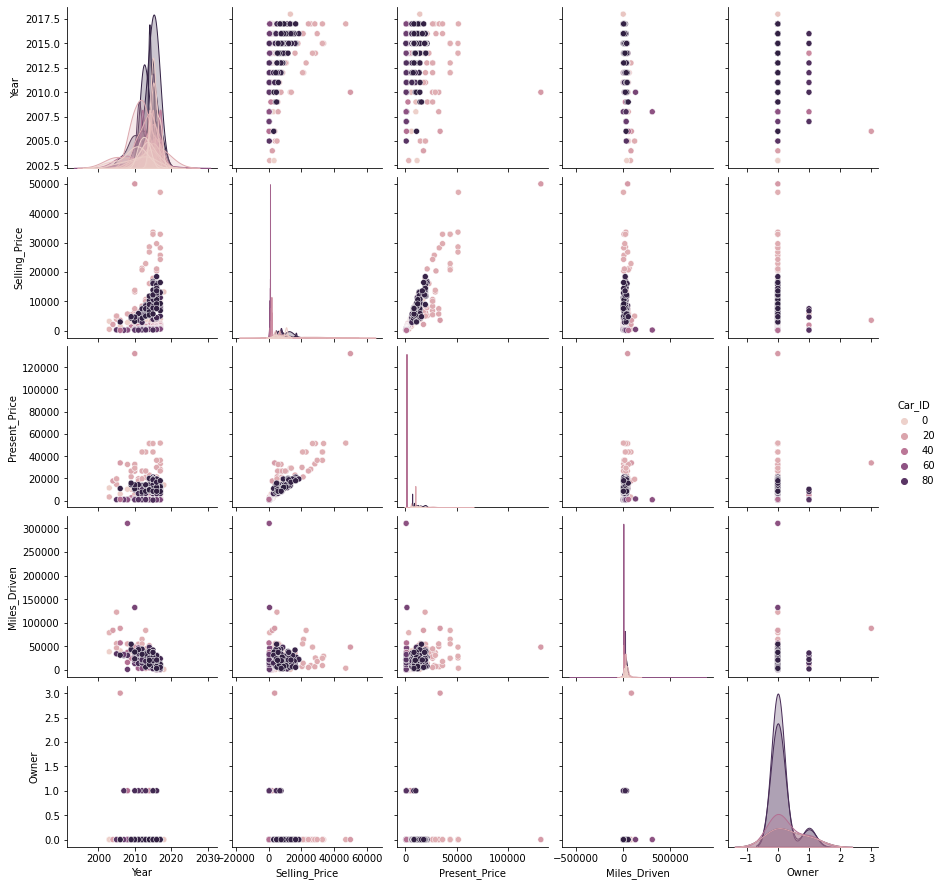

In [7]:
# Creating a pairplot for visualizing all features
sns.pairplot(data = df.drop(columns = 'Unnamed: 0', axis = 1), hue = 'Car_ID')  # dropping Unnamed duplicate of Car_ID

In [8]:
# Since we have no missing values, we can jump to understanding our features and then move to feature engineering
for x in ['Car_ID','Year','Fuel_Type','Seller_Type','Transmission','Owner']:  # Finding number of unique values
    print(x, len(df[x].unique()))

Car_ID 98
Year 16
Fuel_Type 3
Seller_Type 2
Transmission 2
Owner 3


In [9]:
# Checking the unique values in the features with fewer labels
for x in ['Seller_Type','Fuel_Type','Transmission','Owner']:
    print(x,':',df[x].unique())

Seller_Type : ['Dealer' 'Individual']
Fuel_Type : ['Petrol' 'Diesel' 'CNG']
Transmission : ['Manual' 'Automatic']
Owner : [0 1 3]


In [10]:
# Checking occurances of all unique values in the 'Car_Name' and 'Year' features
for x in ['Car_ID','Year']:
    print(x, ': \n',df[x].value_counts().sort_values(ascending = False),'\n')

Car_ID : 
 94    26
17    16
93    14
15    11
95    10
86     9
2      9
16     9
87     8
29     7
97     7
96     7
8      6
89     6
1      6
4      5
10     5
88     5
20     4
44     4
32     4
0      4
3      4
9      4
54     3
90     3
25     3
92     3
40     3
41     3
38     3
43     3
19     3
18     3
51     2
45     2
37     2
56     2
81     2
52     2
91     2
27     2
49     2
74     2
47     2
69     2
60     2
78     2
61     2
62     2
46     2
77     1
68     1
67     1
66     1
65     1
64     1
63     1
59     1
58     1
57     1
53     1
30     1
70     1
75     1
42     1
39     1
72     1
35     1
34     1
33     1
76     1
31     1
50     1
55     1
71     1
12     1
79     1
24     1
23     1
21     1
22     1
73     1
14     1
80     1
13     1
11     1
28     1
82     1
83     1
84     1
7      1
6      1
5      1
85     1
26     1
36     1
48     1
Name: Car_ID, dtype: int64 

Year : 
 2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
201

Based on the EDA, we can infer that Car_ID refers to the brand of the car but is encoded. So for the purpose of our application, we'll drop the column. We'll drop the unnamed duplicate column as well. Temporal feature 'Year' can be converted into "age" by subtracting it from the current year and getting a scalar value. Other categorical features can be label encoded and all features scaled.

Let's move on to feature engineering.

#### Feature Engineering

In [11]:
# Dropping unnamed column and 'Car_ID' feature
df = df.drop(columns = ['Unnamed: 0','Car_ID'], axis = 1)

In [12]:
# Creating 'Age' feature and assigning it the value of 'Current Year'-'Year'
df['Age'] = 2020
df['Age'] = df['Age']-df['Year']
df = df.drop(columns = 'Year', axis = 1) # dropping 'Year' column

In [13]:
df.head()

,Selling_Price,Present_Price,Miles_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,4786,7986,16770.0,Petrol,Dealer,Manual,0,6
1,6786,13629,26708.0,Diesel,Dealer,Manual,0,7
2,10357,14071,4286.0,Petrol,Dealer,Manual,0,3
3,4071,5929,3230.0,Petrol,Dealer,Manual,0,9
4,6571,9814,26366.0,Diesel,Dealer,Manual,0,6


In [14]:
# Converting categorical features to dummy variables
df = pd.get_dummies(df,drop_first = True)

In [15]:
# Splitting into X and y matrices
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [16]:
# Splitting into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [17]:
# Feature Scaling - Random Forest does not require scaling but we're trying all models
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
SC.fit(X_train)
X_train = SC.transform(X_train)
X_test = SC.transform(X_test)

#### Modeling

##### 1. Linear Regression

In [18]:
# Importing the regression library and instantiating
from sklearn.linear_model import LinearRegression
lregressor = LinearRegression()
# Fitting the model
lregressor.fit(X_train, y_train)

LinearRegression()

In [19]:
# Predicting the results and getting score
from sklearn.metrics import r2_score
y_pred_lr = lregressor.predict(X_test)
lr_score = r2_score(y_test, y_pred_lr)
print(lr_score)

0.914433898196396


In [20]:
# RMSE
from sklearn.metrics import mean_squared_error
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(lr_rmse)

2100.93508036564


##### 2. RandomForest Regressor

In [21]:
# importing the library and fitting the model
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor()
rfregressor.fit(X_train, y_train)

RandomForestRegressor()

In [22]:
# Predicting the results
y_pred_rf = rfregressor.predict(X_test)
rf_score = r2_score(y_test,y_pred_rf)
print(rf_score)

0.9580500171078826


In [23]:
# RMSE
rf_rmse = np.sqrt(mean_squared_error(y_test,y_pred_rf))
print(rf_rmse)

1471.0507416118319


##### 3. XGBoost

In [24]:
# Importing and fitting XGB
import xgboost as xgb
xgbregressor = xgb.XGBRegressor()
xgbregressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [25]:
# Predicting results and score
y_pred_x = xgbregressor.predict(X_test)
x_score = r2_score(y_test,y_pred_x)
print(x_score)

0.9561180791056505


In [26]:
# RMSE
x_rmse = np.sqrt(mean_squared_error(y_test,y_pred_x))
print(x_rmse)

1504.542895846386


Let us cross-validate using RandomForest as it has the best metrics out of the three models

#### Cross validation with RandomizedSearchCV

In [27]:
# Importing the necessary framework
from sklearn.model_selection import RandomizedSearchCV

# Creating a hyperparameter grid
par_grid = {'n_estimators': [50,100,200,350,500,750,950,1200,1450],
            'max_features' : ['auto','sqrt'],
            'max_depth'  : [5,6,7,8,9,10,16,20,30],
            'min_samples_leaf': [1, 2, 5, 10],
            'min_samples_split': [2, 5, 10, 15, 100],
            }

# Creating base model for tuning
rf2 = RandomForestRegressor()

# Instantiating the RandomizeSearchCV object
rmdsc = RandomizedSearchCV(estimator = rf2, param_distributions = par_grid, n_iter = 6, cv = 5, verbose = 2,n_jobs = -1,
                          random_state = 42)

In [28]:
# Fitting the new object
rmdsc.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   25.4s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=6, n_jobs=-1,
                   param_distributions={'max_depth': [5, 6, 7, 8, 9, 10, 16, 20,
                                                      30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [50, 100, 200, 350, 500,
                                                         750, 950, 1200,
                                                         1450]},
                   random_state=42, verbose=2)

In [29]:
rmdsc.best_score_

0.9125513264949511

In [30]:
y_pred_tuned = rmdsc.predict(X_test)

In [31]:
r2_score(y_test,y_pred_tuned)

0.9506756318401618

Our original RandomForest Regressor has the best score and we select that model to feed to our app. For this we use Pickle in the next step.

#### Pickling

In [32]:
import pickle
# open a file, where you want to store the data
myfile = open('rmdscmodel.pkl', 'wb') # write and binary

# dump information to that file
pickle.dump(rmdsc, myfile)

In [33]:
print(rmdsc.predict(SC.transform([[15000,40000,1,7,0,1,1,0]])))

[7802.68115389]


In [34]:
df.describe()

,Selling_Price,Present_Price,Miles_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,6659.003322,10897.880399,22948.571429,0.043189,6.372093,0.199336,0.794020,0.352159,0.867110
std,7261.130095,12348.765423,24153.348069,0.247915,2.891554,0.400166,0.405089,0.478439,0.340021
min,143.000000,457.000000,311.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,1286.000000,1714.000000,9317.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000
50%,5143.000000,9143.000000,19876.000000,0.000000,6.000000,0.000000,1.000000,0.000000,1.000000
75%,8571.000000,14143.000000,30290.000000,0.000000,8.000000,0.000000,1.000000,1.000000,1.000000
max,50000.000000,132286.000000,310559.000000,3.000000,17.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
# Pickling scalar object - Random Forest doesn't need scaling, but we scaled the training data, hence new data should be too
import pickle
#open a file, where you want to store the data
myscalarfile = open('scalarobject.pkl', 'wb') # write and binary

# dump information to that file
pickle.dump(SC, myscalarfile)